In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score


In [3]:
df=pd.read_csv("/content/Company_Data (1).csv")

In [4]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [7]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

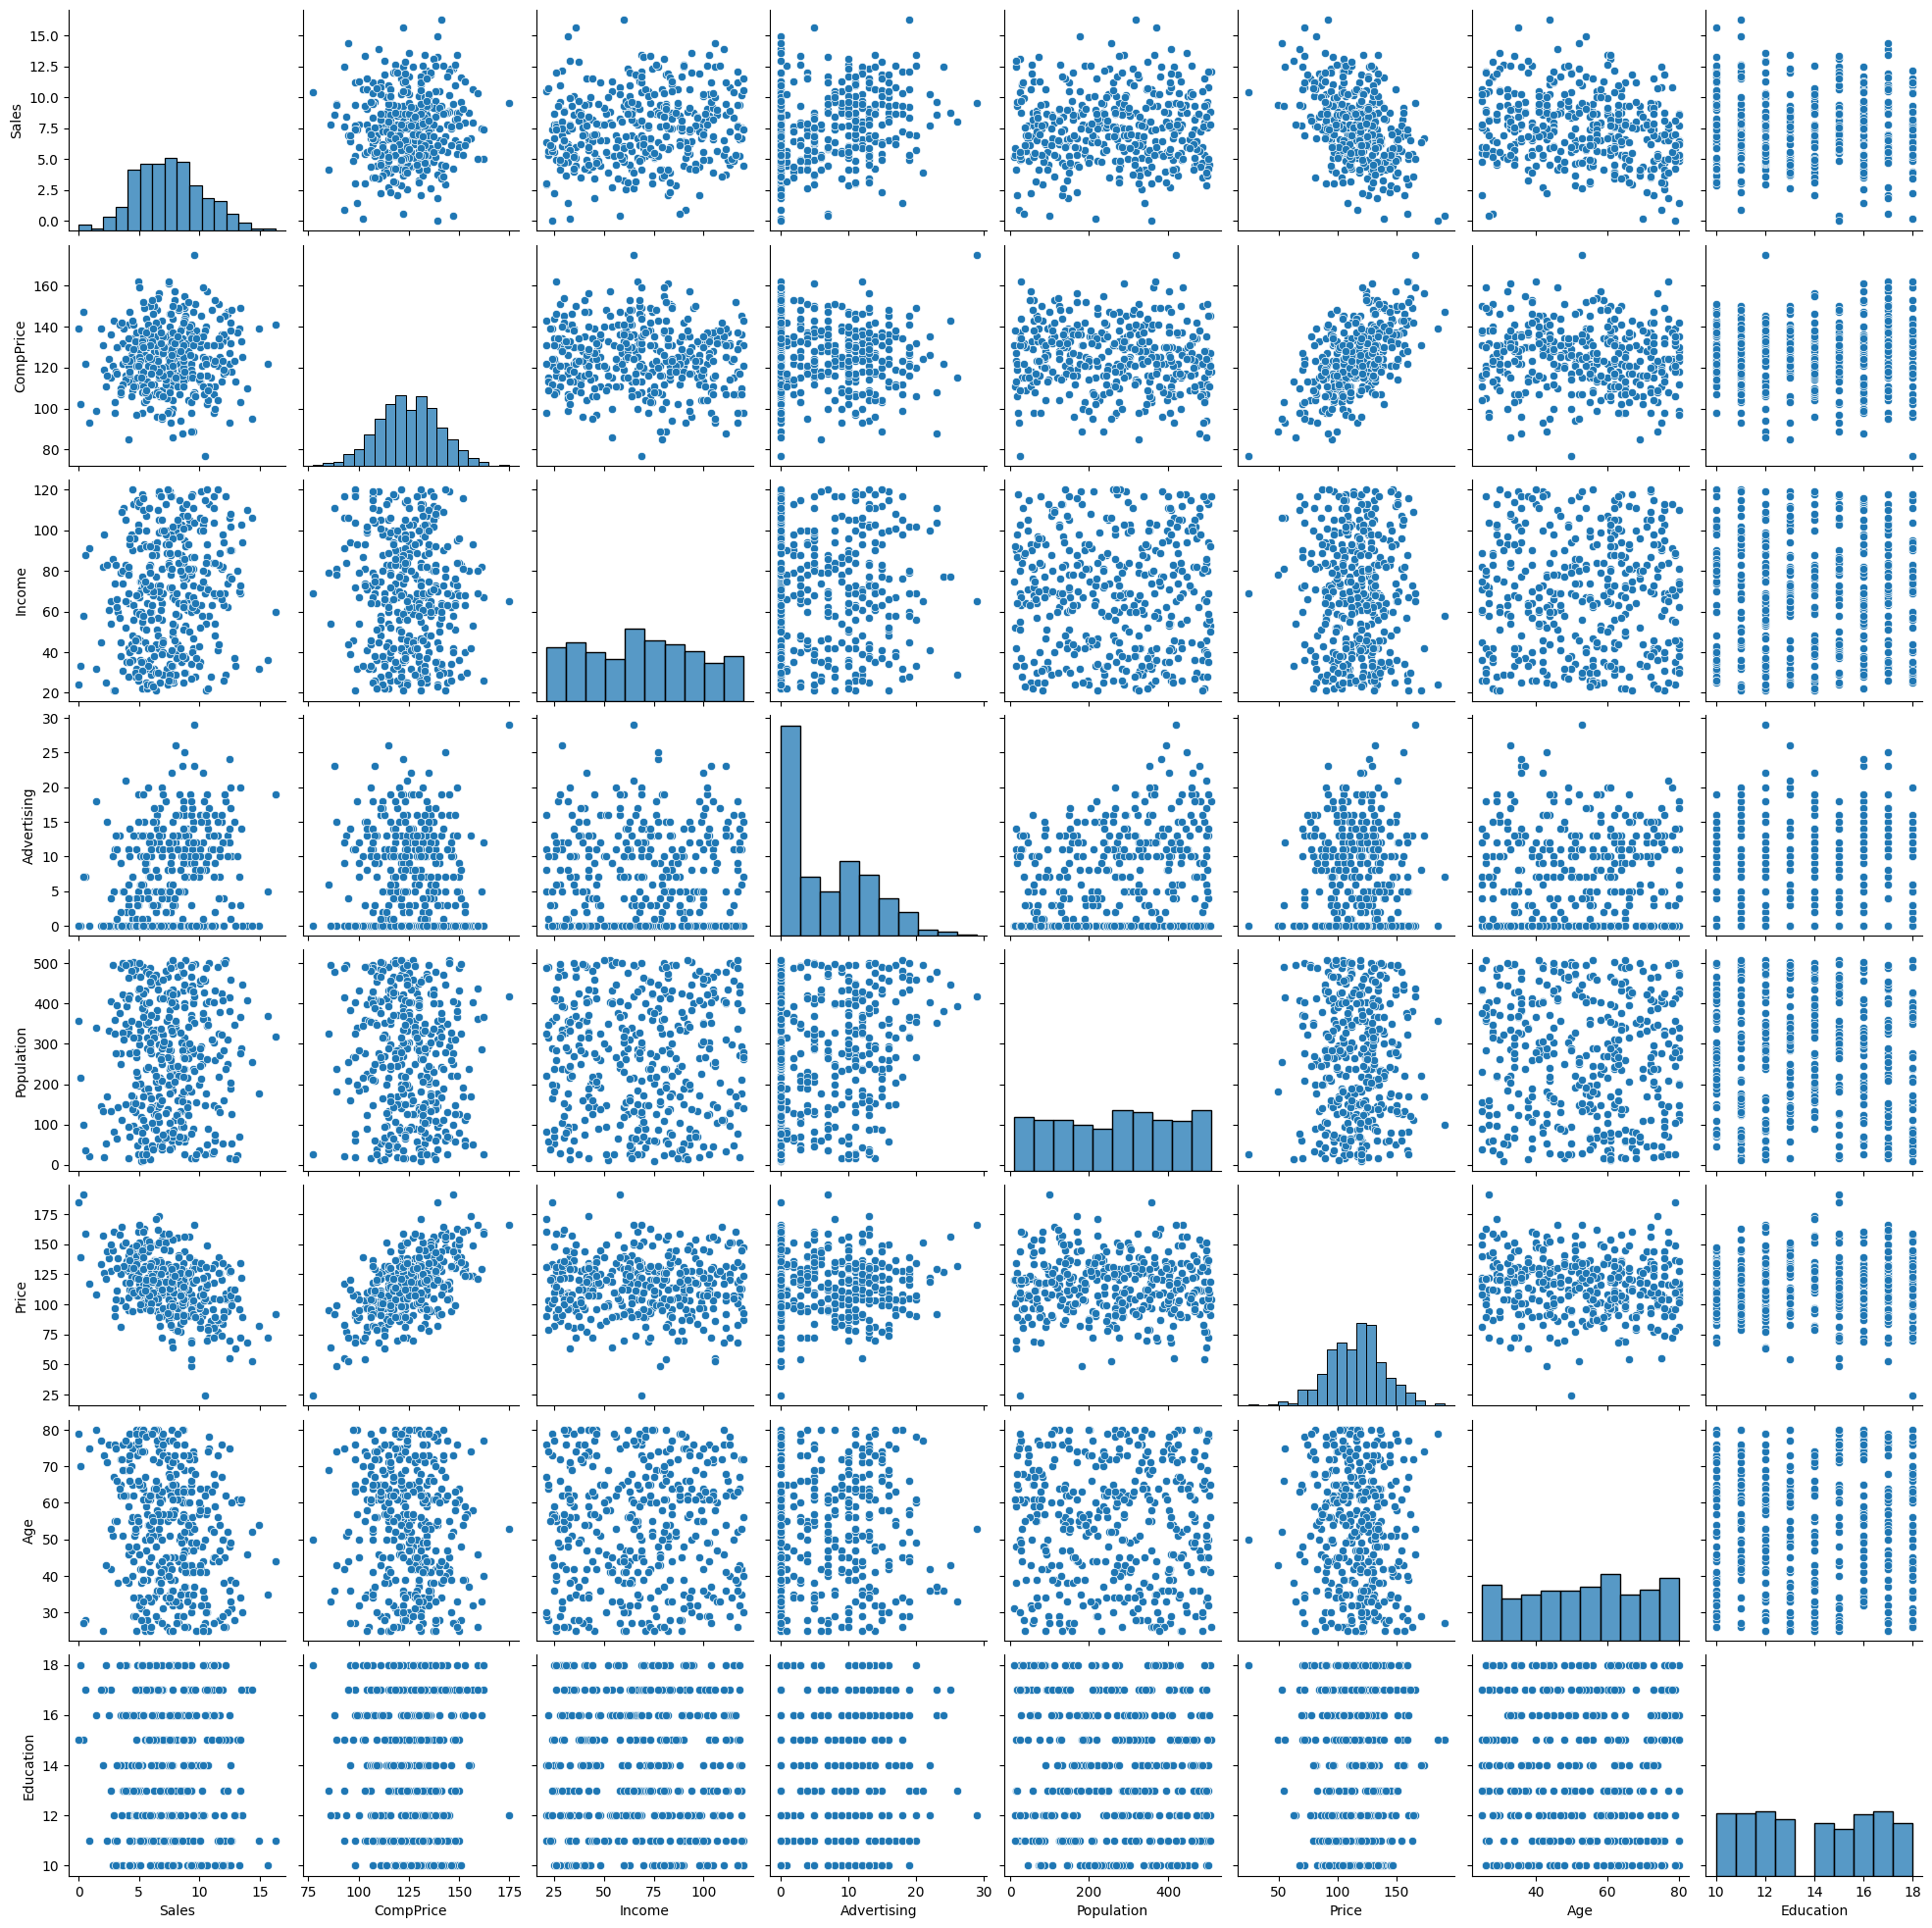

In [8]:
sns.pairplot(df)

In [9]:
#categorical variables

category= [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(category)))
print('The categorical variables are as follows :\n\n',category)

There are 3 categorical variables

The categorical variables are as follows :

 ['ShelveLoc', 'Urban', 'US']


In [10]:
numerical=[var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerival variables are :', numerical)

There are 8 numerical variables

The numerival variables are : ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education']


In [11]:
#cardinality check
for var in category:
  print(var, 'has', len(df[var].unique()), 'labels')

ShelveLoc has 3 labels
Urban has 2 labels
US has 2 labels


In [12]:
df[df.duplicated()].shape

(0, 11)

In [13]:
df=pd.get_dummies(df,columns=['Urban','US'], drop_first=True)

In [14]:
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])

In [15]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [16]:
df['Sales']=pd.cut(df['Sales'], bins=[-1,7.5,16.3], labels=['low', 'high'])

In [17]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,low,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0


In [18]:
df['Sales']=le.fit_transform(df['Sales'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        400 non-null    int64
 1   CompPrice    400 non-null    int64
 2   Income       400 non-null    int64
 3   Advertising  400 non-null    int64
 4   Population   400 non-null    int64
 5   Price        400 non-null    int64
 6   ShelveLoc    400 non-null    int64
 7   Age          400 non-null    int64
 8   Education    400 non-null    int64
 9   Urban_Yes    400 non-null    uint8
 10  US_Yes       400 non-null    uint8
dtypes: int64(9), uint8(2)
memory usage: 29.0 KB


In [20]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [21]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes'],
      dtype='object')

In [22]:
df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']]=ms.fit_transform(df[['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban_Yes', 'US_Yes']])

In [23]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,0.0,0.622449,0.525253,0.379310,0.533066,0.574850,0.0,0.309091,0.875,1.0,1.0
1,0.0,0.346939,0.272727,0.551724,0.501002,0.353293,0.5,0.727273,0.000,1.0,1.0
2,0.0,0.367347,0.141414,0.344828,0.519038,0.335329,1.0,0.618182,0.250,1.0,1.0
3,1.0,0.408163,0.797980,0.137931,0.913828,0.437126,1.0,0.545455,0.500,1.0,1.0
4,1.0,0.653061,0.434343,0.103448,0.661323,0.622754,0.0,0.236364,0.375,1.0,0.0


In [24]:
x=df.iloc[:,1:]
y=df.iloc[:,:1]
y

,Sales
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
395,0.0
396,1.0
397,1.0
398,1.0


In [25]:
df.Sales.value_counts()

1.0    202
0.0    198
Name: Sales, dtype: int64

In [26]:
colnames=list(df.columns)
colnames


['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [27]:
#Splitting the data into training and testing data

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=40)

# **Building Decision Tree Classifier using Entropy Criteria**

In [28]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=4)
model1.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

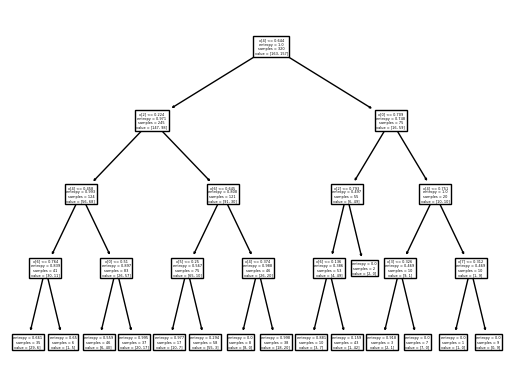

In [29]:
tree.plot_tree(model1)
plt.show()

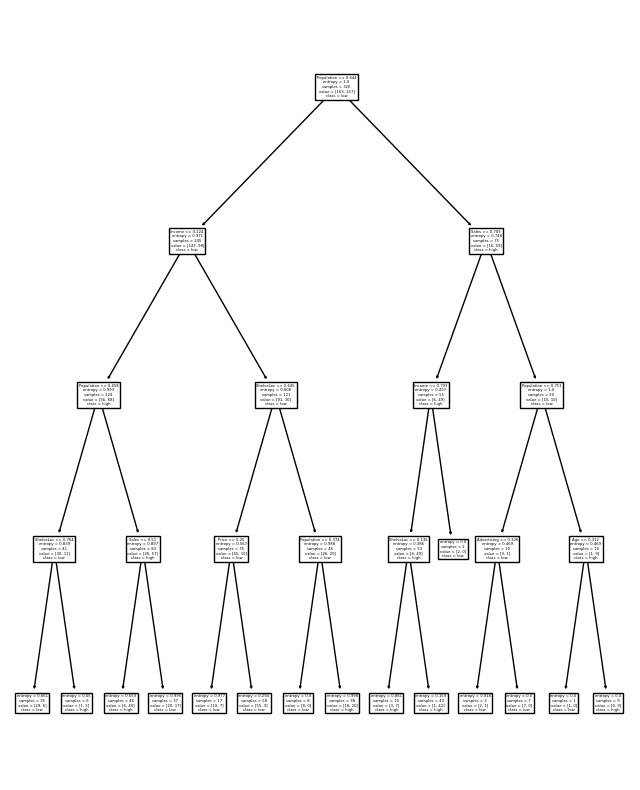

In [30]:
fn=df.columns
cn=['low','high']
plt.figure(figsize=(8,10))
tree.plot_tree(model1,feature_names=fn, class_names=cn)
plt.show()

In [31]:
ypred=model1.predict(xtest)
ypred

array([1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

In [32]:
pd.Series(ypred).value_counts()

0.0    41
1.0    39
dtype: int64

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         0.0       0.61      0.71      0.66        35
         1.0       0.74      0.64      0.69        45

    accuracy                           0.68        80
   macro avg       0.68      0.68      0.67        80
weighted avg       0.69      0.68      0.68        80



In [34]:
model1.score(xtrain,ytrain)

0.803125

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.675

In [36]:
model1.feature_importances_

array([0.1471965 , 0.        , 0.16984126, 0.01378543, 0.41604258,
       0.06296824, 0.15675473, 0.03341126, 0.        , 0.        ])

# **Finding the Best Hyper-Parameter for the Decision Treee**

In [37]:
dt=DecisionTreeClassifier()

In [38]:
param_grid={'criterion' : ['entropy','grid'],
            'max_depth' : [2,3,4,5,6,7,8,9,10],
            'min_samples_split' : [2,3,4,5,6,7,8,9,10],
            'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10]}

In [39]:
grid_search=GridSearchCV(dt,param_grid,cv=5)

In [40]:
grid_search.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
4050 fits failed out of a total of 8100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4050 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _v

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'grid'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [41]:
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [42]:
#Decision Tree for best model

model_best=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_split=2,min_samples_leaf=2)
model_best.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=2)

In [43]:
ypred_b=model_best.predict(xtest)

In [44]:
print(classification_report(ytest,ypred_b))

              precision    recall  f1-score   support

         0.0       0.62      0.66      0.64        35
         1.0       0.72      0.69      0.70        45

    accuracy                           0.68        80
   macro avg       0.67      0.67      0.67        80
weighted avg       0.68      0.68      0.68        80



In [45]:
model_best.score(xtrain,ytrain)

0.953125

In [46]:
print("The accuracy of the model =", accuracy_score(ytest,ypred_b)*100)

The accuracy of the model = 67.5


<function matplotlib.pyplot.show(close=None, block=None)>

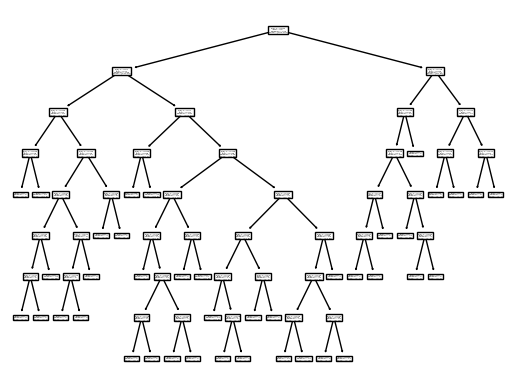

In [47]:
tree.plot_tree(model_best)
plt.show

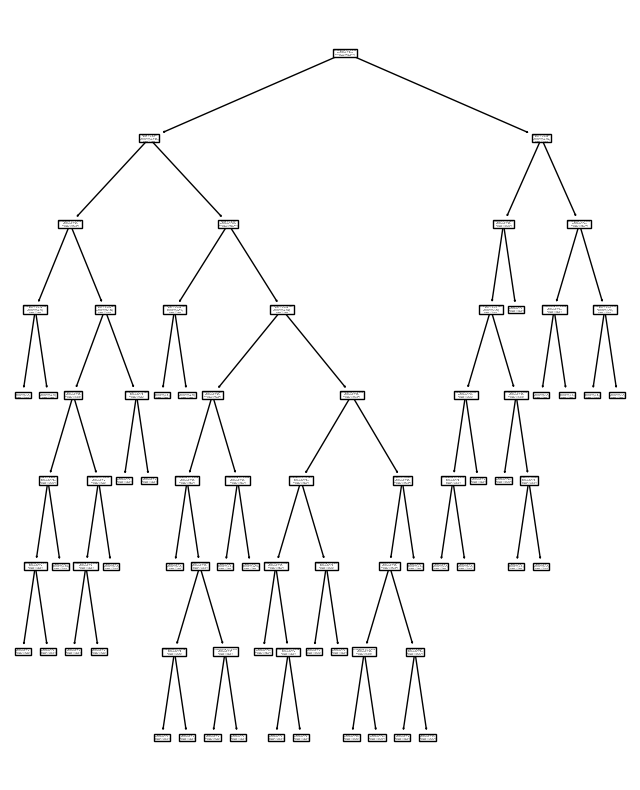

In [48]:
fn=df.columns
cn=['low','high']
plt.figure(figsize=(8,10))
tree.plot_tree(model_best,feature_names=fn, class_names=cn)
plt.show()

# **Moedl Building Using Random Forest**

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy",n_estimators=300,max_features=3)

In [53]:
res=cross_val_score(rf,x,y,cv=10)
print(res.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.8025


In [55]:
#Adaaboost

from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=100,random_state=30)

In [58]:
res1=cross_val_score(ad,x,y,cv=10)
print(res1.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

0.825
